In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 64 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1,

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0001)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0001)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

118it [00:20,  5.83it/s]                         


Epoch 1 of 100
Generator loss: -0.39445414, Discriminator loss: 0.33217771


118it [00:15,  7.71it/s]                         


Epoch 2 of 100
Generator loss: -0.02286313, Discriminator loss: 0.05013784


118it [00:15,  7.66it/s]                         


Epoch 3 of 100
Generator loss: -0.06855042, Discriminator loss: 0.07467947


118it [00:15,  7.48it/s]                         


Epoch 4 of 100
Generator loss: -0.00009747, Discriminator loss: 0.00015384


118it [00:15,  7.42it/s]                         


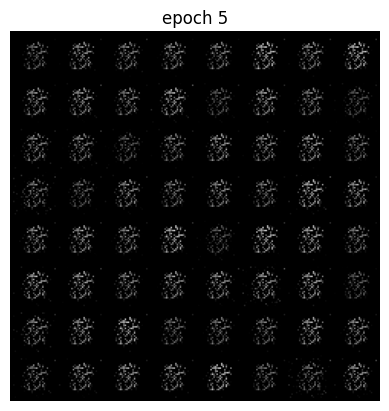

Epoch 5 of 100
Generator loss: -0.00013002, Discriminator loss: 0.00015875


118it [00:17,  6.87it/s]                         


Epoch 6 of 100
Generator loss: -0.00015037, Discriminator loss: 0.00017473


118it [00:15,  7.53it/s]                         


Epoch 7 of 100
Generator loss: -0.00030143, Discriminator loss: 0.00026801


118it [00:15,  7.48it/s]                         


Epoch 8 of 100
Generator loss: -0.13892915, Discriminator loss: 0.14062393


118it [00:15,  7.47it/s]                         


Epoch 9 of 100
Generator loss: -0.00000079, Discriminator loss: 0.00273868


118it [00:15,  7.51it/s]                         


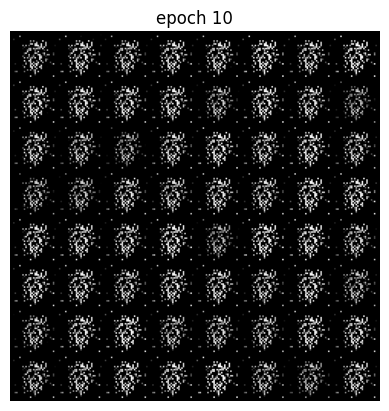

Epoch 10 of 100
Generator loss: -0.00000501, Discriminator loss: 0.00023513


118it [00:16,  7.24it/s]                         


Epoch 11 of 100
Generator loss: -0.00000959, Discriminator loss: 0.00014088


118it [00:16,  7.26it/s]                         


Epoch 12 of 100
Generator loss: -0.00001837, Discriminator loss: 0.00010760


118it [00:16,  7.25it/s]                         


Epoch 13 of 100
Generator loss: -0.00001466, Discriminator loss: 0.00007673


118it [00:15,  7.45it/s]                         


Epoch 14 of 100
Generator loss: -0.00002603, Discriminator loss: 0.00006513


118it [00:16,  7.31it/s]                         


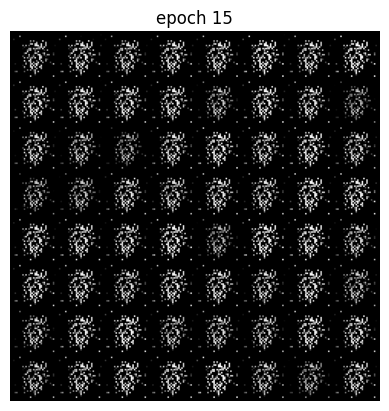

Epoch 15 of 100
Generator loss: -0.00011199, Discriminator loss: 0.00008387


118it [00:16,  7.37it/s]                         


Epoch 16 of 100
Generator loss: -0.00077152, Discriminator loss: 0.00044212


118it [00:16,  7.35it/s]                         


Epoch 17 of 100
Generator loss: -0.16619522, Discriminator loss: 0.15781549


118it [00:15,  7.49it/s]                         


Epoch 18 of 100
Generator loss: -0.00019418, Discriminator loss: 0.00037646


118it [00:16,  7.24it/s]                         


Epoch 19 of 100
Generator loss: -0.00011294, Discriminator loss: 0.00020146


118it [00:16,  7.26it/s]                         


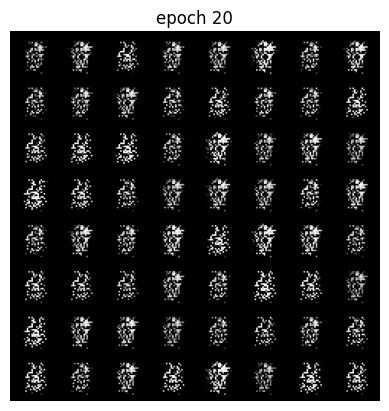

Epoch 20 of 100
Generator loss: -0.00007632, Discriminator loss: 0.00014097


118it [00:16,  7.35it/s]                         


Epoch 21 of 100
Generator loss: -0.00006199, Discriminator loss: 0.00009709


118it [00:15,  7.42it/s]                         


Epoch 22 of 100
Generator loss: -0.00004293, Discriminator loss: 0.00007276


118it [00:16,  7.32it/s]                         


Epoch 23 of 100
Generator loss: -0.00004284, Discriminator loss: 0.00005877


118it [00:15,  7.38it/s]                         


Epoch 24 of 100
Generator loss: -0.00004286, Discriminator loss: 0.00005509


118it [00:15,  7.39it/s]                         


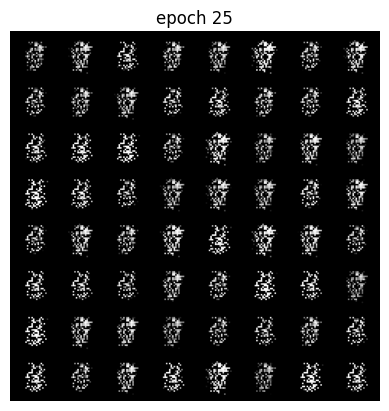

Epoch 25 of 100
Generator loss: -0.00002755, Discriminator loss: 0.00005205


118it [00:15,  7.45it/s]                         


Epoch 26 of 100
Generator loss: -0.00002721, Discriminator loss: 0.00004599


118it [00:16,  7.15it/s]                         


Epoch 27 of 100
Generator loss: -0.00002255, Discriminator loss: 0.00003915


118it [00:16,  7.23it/s]                         


Epoch 28 of 100
Generator loss: -0.00002822, Discriminator loss: 0.00003713


118it [00:15,  7.40it/s]                         


Epoch 29 of 100
Generator loss: -0.00002236, Discriminator loss: 0.00003201


118it [00:15,  7.47it/s]                         


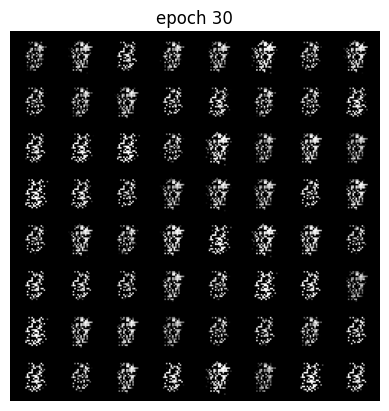

Epoch 30 of 100
Generator loss: -0.00003583, Discriminator loss: 0.00003397


118it [00:16,  7.30it/s]                         


Epoch 31 of 100
Generator loss: -0.00002542, Discriminator loss: 0.00003463


118it [00:16,  7.34it/s]                         


Epoch 32 of 100
Generator loss: -0.00003035, Discriminator loss: 0.00003648


118it [00:15,  7.44it/s]                         


Epoch 33 of 100
Generator loss: -0.00003120, Discriminator loss: 0.00003910


118it [00:16,  7.34it/s]                         


Epoch 34 of 100
Generator loss: -0.00005682, Discriminator loss: 0.00004362


118it [00:16,  7.10it/s]                         


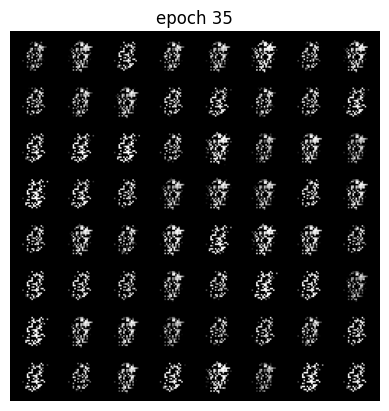

Epoch 35 of 100
Generator loss: -0.00002961, Discriminator loss: 0.00004253


118it [00:16,  7.09it/s]                         


Epoch 36 of 100
Generator loss: -0.00003128, Discriminator loss: 0.00004146


118it [00:16,  7.33it/s]                         


Epoch 37 of 100
Generator loss: -0.00003591, Discriminator loss: 0.00004747


118it [00:16,  7.23it/s]                         


Epoch 38 of 100
Generator loss: -0.00012324, Discriminator loss: 0.00019029


118it [00:16,  7.37it/s]                         


Epoch 39 of 100
Generator loss: -0.02143865, Discriminator loss: 0.08400657


118it [00:16,  7.35it/s]                         


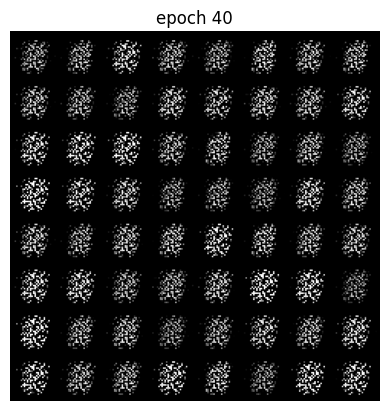

Epoch 40 of 100
Generator loss: -0.00007565, Discriminator loss: 0.00014908


118it [00:16,  7.29it/s]                         


Epoch 41 of 100
Generator loss: -0.21535716, Discriminator loss: 0.23560553


118it [00:16,  7.00it/s]                         


Epoch 42 of 100
Generator loss: -0.00047783, Discriminator loss: 0.00162825


118it [00:16,  7.06it/s]                         


Epoch 43 of 100
Generator loss: -0.00006262, Discriminator loss: 0.00016710


118it [00:16,  7.27it/s]                         


Epoch 44 of 100
Generator loss: -0.00004164, Discriminator loss: 0.00011280


118it [00:16,  7.20it/s]                         


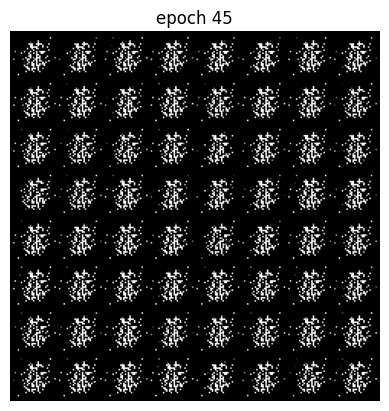

Epoch 45 of 100
Generator loss: -0.00003900, Discriminator loss: 0.00008645


118it [00:16,  7.23it/s]                         


Epoch 46 of 100
Generator loss: -0.00002096, Discriminator loss: 0.00006779


118it [00:16,  7.21it/s]                         


Epoch 47 of 100
Generator loss: -0.00001936, Discriminator loss: 0.00005564


118it [00:16,  7.23it/s]                         


Epoch 48 of 100
Generator loss: -0.00001810, Discriminator loss: 0.00004490


118it [00:16,  7.18it/s]                         


Epoch 49 of 100
Generator loss: -0.00001990, Discriminator loss: 0.00003789


118it [00:16,  7.07it/s]                         


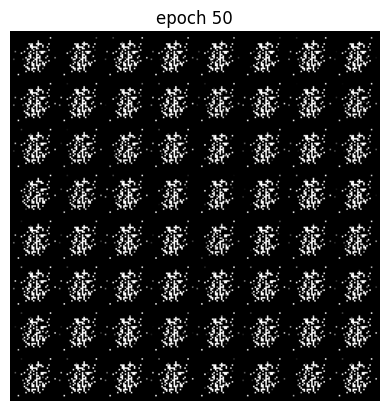

Epoch 50 of 100
Generator loss: -0.00001193, Discriminator loss: 0.00003356


118it [00:16,  7.14it/s]                         


Epoch 51 of 100
Generator loss: -0.00001157, Discriminator loss: 0.00002768


118it [00:16,  7.18it/s]                         


Epoch 52 of 100
Generator loss: -0.00001084, Discriminator loss: 0.00002513


118it [00:16,  7.28it/s]                         


Epoch 53 of 100
Generator loss: -0.00000725, Discriminator loss: 0.00002154


118it [00:16,  7.12it/s]                         


Epoch 54 of 100
Generator loss: -0.00000523, Discriminator loss: 0.00001872


118it [00:16,  7.11it/s]                         


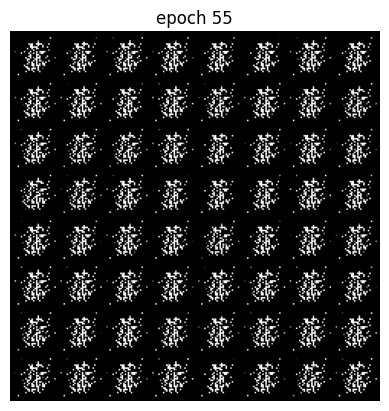

Epoch 55 of 100
Generator loss: -0.00001585, Discriminator loss: 0.00001645


118it [00:16,  7.06it/s]                         


Epoch 56 of 100
Generator loss: -0.00000650, Discriminator loss: 0.00001549


118it [00:17,  6.87it/s]                         


Epoch 57 of 100
Generator loss: -0.00000533, Discriminator loss: 0.00001392


118it [00:17,  6.93it/s]                         


Epoch 58 of 100
Generator loss: -0.00000393, Discriminator loss: 0.00001314


118it [00:16,  7.04it/s]                         


Epoch 59 of 100
Generator loss: -0.00000411, Discriminator loss: 0.00001068


118it [00:16,  7.20it/s]                         


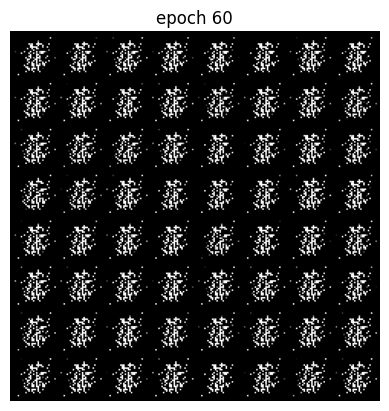

Epoch 60 of 100
Generator loss: -0.00000368, Discriminator loss: 0.00000961


118it [00:16,  7.11it/s]                         


Epoch 61 of 100
Generator loss: -0.00000350, Discriminator loss: 0.00000879


118it [00:16,  7.12it/s]                         


Epoch 62 of 100
Generator loss: -0.00000324, Discriminator loss: 0.00000894


118it [00:16,  7.13it/s]                         


Epoch 63 of 100
Generator loss: -0.00000468, Discriminator loss: 0.00000696


118it [00:17,  6.90it/s]                         


Epoch 64 of 100
Generator loss: -0.00000296, Discriminator loss: 0.00000620


118it [00:17,  6.83it/s]                         


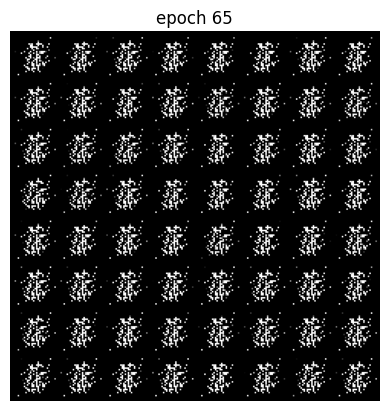

Epoch 65 of 100
Generator loss: -0.00000240, Discriminator loss: 0.00000578


118it [00:16,  6.97it/s]                         


Epoch 66 of 100
Generator loss: -0.00000198, Discriminator loss: 0.00000550


118it [00:16,  7.12it/s]                         


Epoch 67 of 100
Generator loss: -0.00000228, Discriminator loss: 0.00000537


118it [00:16,  7.14it/s]                         


Epoch 68 of 100
Generator loss: -0.00000110, Discriminator loss: 0.00000468


118it [00:16,  7.04it/s]                         


Epoch 69 of 100
Generator loss: -0.00000346, Discriminator loss: 0.00000449


118it [00:16,  7.00it/s]                         


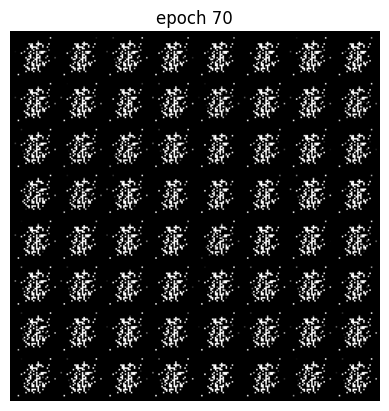

Epoch 70 of 100
Generator loss: -0.00000089, Discriminator loss: 0.00000346


118it [00:17,  6.90it/s]                         


Epoch 71 of 100
Generator loss: -0.00000138, Discriminator loss: 0.00000344


118it [00:17,  6.81it/s]                         


Epoch 72 of 100
Generator loss: -0.00000183, Discriminator loss: 0.00000292


118it [00:16,  7.11it/s]                         


Epoch 73 of 100
Generator loss: -0.00000118, Discriminator loss: 0.00000284


118it [00:16,  7.10it/s]                         


Epoch 74 of 100
Generator loss: -0.00000166, Discriminator loss: 0.00000272


118it [00:16,  7.08it/s]                         


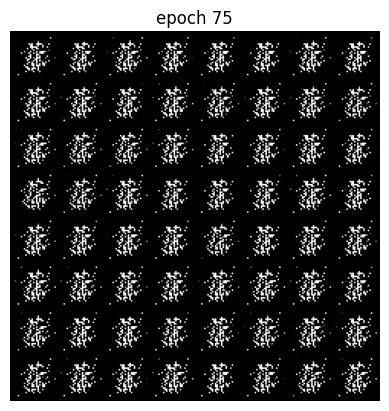

Epoch 75 of 100
Generator loss: -0.00000143, Discriminator loss: 0.00000253


118it [00:16,  7.02it/s]                         


Epoch 76 of 100
Generator loss: -0.00000211, Discriminator loss: 0.00000247


118it [00:17,  6.82it/s]                         


Epoch 77 of 100
Generator loss: -0.00000237, Discriminator loss: 0.00000238


118it [00:17,  6.78it/s]                         


Epoch 78 of 100
Generator loss: -0.00000059, Discriminator loss: 0.00000191


118it [00:16,  6.94it/s]                         


Epoch 79 of 100
Generator loss: -0.00000053, Discriminator loss: 0.00000197


118it [00:17,  6.93it/s]                         


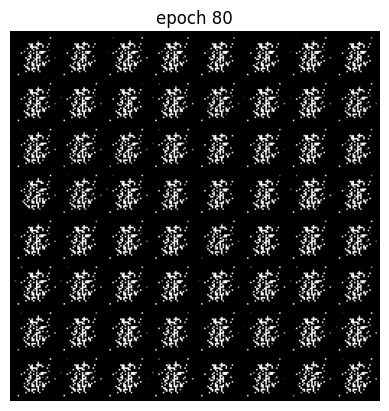

Epoch 80 of 100
Generator loss: -0.00000059, Discriminator loss: 0.00000155


118it [00:17,  6.86it/s]                         


Epoch 81 of 100
Generator loss: -0.00000055, Discriminator loss: 0.00000177


118it [00:16,  6.95it/s]                         


Epoch 82 of 100
Generator loss: -0.00000025, Discriminator loss: 0.00000268


118it [00:16,  7.00it/s]                         


Epoch 83 of 100
Generator loss: -0.00000038, Discriminator loss: 0.00000156


118it [00:17,  6.92it/s]                         


Epoch 84 of 100
Generator loss: -0.00000058, Discriminator loss: 0.00000126


118it [00:17,  6.78it/s]                         


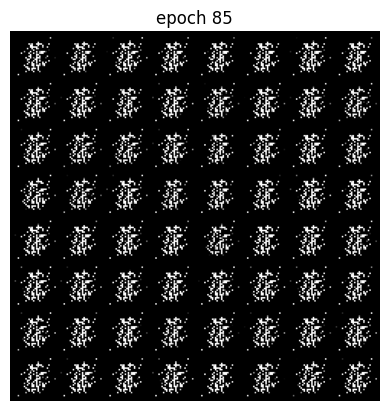

Epoch 85 of 100
Generator loss: -0.00007267, Discriminator loss: 0.00004582


118it [00:16,  6.96it/s]                         


Epoch 86 of 100
Generator loss: -0.00000009, Discriminator loss: 0.00001421


118it [00:16,  7.06it/s]                         


Epoch 87 of 100
Generator loss: -0.00000105, Discriminator loss: 0.00004980


118it [00:17,  6.87it/s]                         


Epoch 88 of 100
Generator loss: -0.00000479, Discriminator loss: 0.00000270


118it [00:16,  7.02it/s]                         


Epoch 89 of 100
Generator loss: -0.11180747, Discriminator loss: 0.12043431


118it [00:16,  6.98it/s]                         


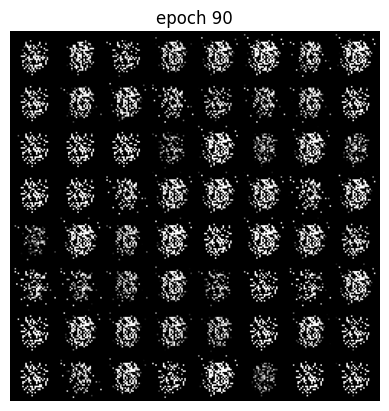

Epoch 90 of 100
Generator loss: -0.06874462, Discriminator loss: 0.06181861


118it [00:17,  6.84it/s]                         


Epoch 91 of 100
Generator loss: -0.00055045, Discriminator loss: 0.00118187


118it [00:17,  6.79it/s]                         


Epoch 92 of 100
Generator loss: -0.00012888, Discriminator loss: 0.00034758


118it [00:17,  6.90it/s]                         


Epoch 93 of 100
Generator loss: -0.00009717, Discriminator loss: 0.00023319


118it [00:17,  6.91it/s]                         


Epoch 94 of 100
Generator loss: -0.00003547, Discriminator loss: 0.00013663


118it [00:17,  6.92it/s]                         


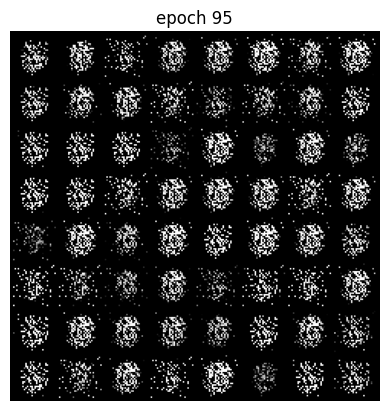

Epoch 95 of 100
Generator loss: -0.00002843, Discriminator loss: 0.00010449


118it [00:17,  6.94it/s]                         


Epoch 96 of 100
Generator loss: -0.00006193, Discriminator loss: 0.00012014


118it [00:17,  6.92it/s]                         


Epoch 97 of 100
Generator loss: -0.02124220, Discriminator loss: 0.02562912


118it [00:17,  6.65it/s]                         


Epoch 98 of 100
Generator loss: -0.01098306, Discriminator loss: 0.01933093


118it [00:18,  6.54it/s]                         


Epoch 99 of 100
Generator loss: -0.00006651, Discriminator loss: 0.00025192


118it [00:16,  6.97it/s]                         


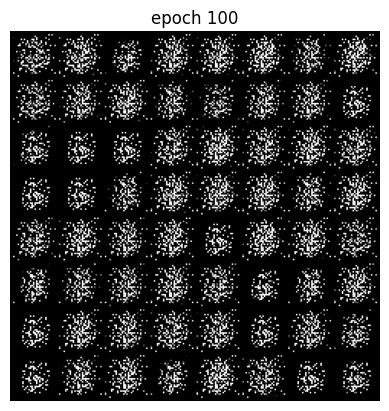

Epoch 100 of 100
Generator loss: -0.00002204, Discriminator loss: 0.00015343


In [14]:
torch.manual_seed(3276)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################


for epoch in range(epochs):
# for epoch in range(30):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
    # for bi, data in tqdm(enumerate(train_loader), total=30):
        ############ YOUR CODE HERE ##########
        realImg,_ = data
        realImg = realImg.view(-1, 28*28).to(device)

        lblR = label_real(realImg.shape[0])
        lblF = label_fake(realImg.shape[0])

        noiseSamp = create_noise(realImg.shape[0], nz)
        fakeImg = generator(noiseSamp)

        discR = discriminator(realImg)
        lossR = discriminator_loss(discR, lblR)
        discF = discriminator(fakeImg)
        lossF = discriminator_loss(discF, lblF)

        lossDiscTotal = (lossR + lossF) / 2
        loss_d += lossDiscTotal.item()

        discriminator.zero_grad()
        lossDiscTotal.backward(retain_graph = True)
        optim_d.step()

        discF_new = discriminator(fakeImg)

        lossGen = generator_loss(discF_new, lblF)
        lossGen = -lossGen
        loss_g += lossGen.item()

        generator.zero_grad()
        lossGen.backward()
        optim_g.step()

        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

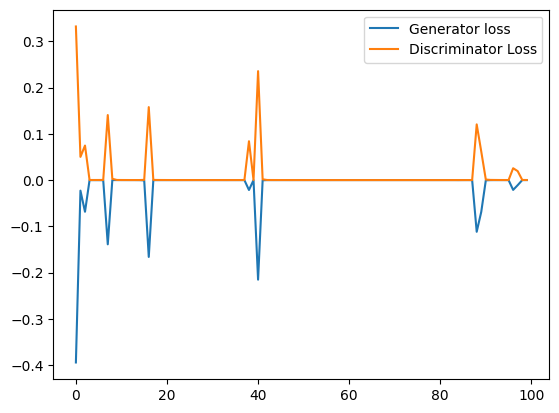

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')